get data on (https://github.com/stedy/Machine-Learning-with-R-datasets)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
sns.set(style="white", palette="muted", color_codes=True)



insurance = pd.read_csv('Desktop/datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


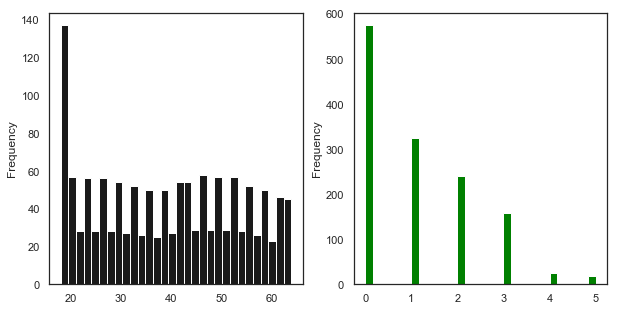

In [4]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
insurance.age.plot(kind='hist', bins = 30, ax = axes[0], color='k')
insurance.children.plot(kind='hist', bins = 30, ax = axes[1], color='green')

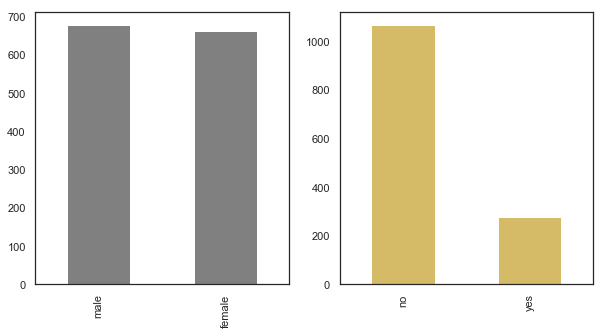

In [5]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
insurance.sex.value_counts().plot(kind='bar', ax =axes[0], color = 'gray')
insurance.smoker.value_counts().plot(kind='bar', ax =axes[1], color='y')

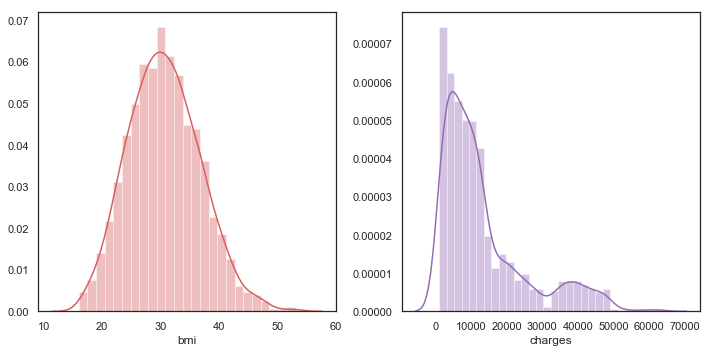

In [6]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(insurance['bmi'], color = 'r', ax = axes[0])
sns.distplot(insurance['charges'], color = 'm', ax = axes[1])
plt.tight_layout()

<Figure size 1440x360 with 0 Axes>

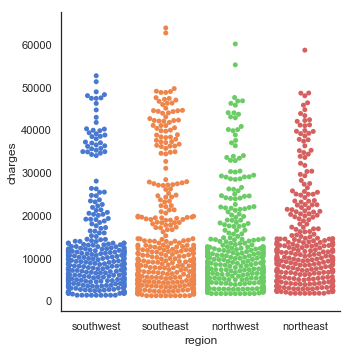

In [7]:
plt.figure(figsize=(20,5))
sns.catplot(x="region", y="charges",
                     data=insurance, kind='swarm')

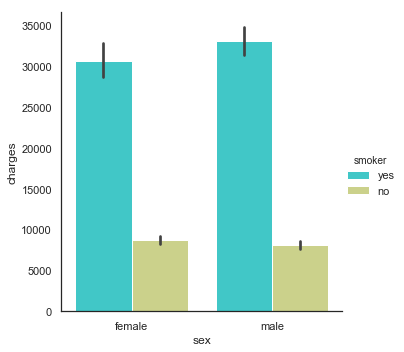

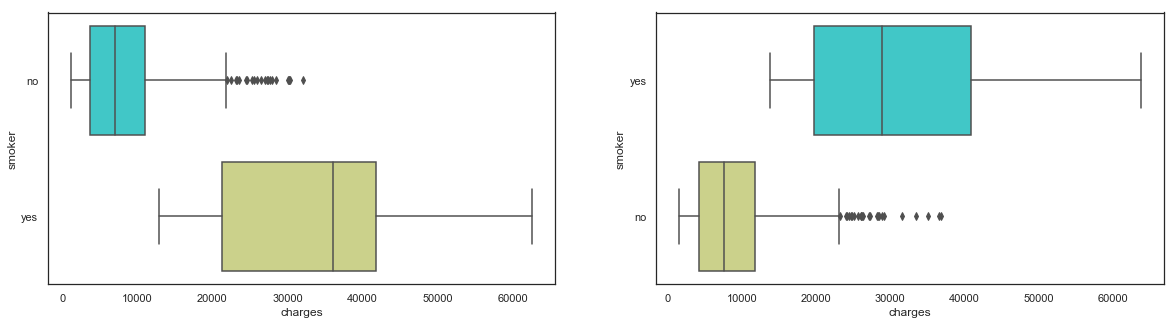

In [9]:

sns.catplot(x='sex', y='charges', hue='smoker', data = insurance, kind='bar', palette='rainbow')
plt.show()
f, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(y="smoker", x="charges", data = insurance[insurance.sex=='male'], orient="h", palette = 'rainbow', ax=axes[0])
sns.boxplot(y="smoker", x="charges", data = insurance[insurance.sex=='female'], orient="h", palette = 'rainbow',ax=axes[1])
plt.show()

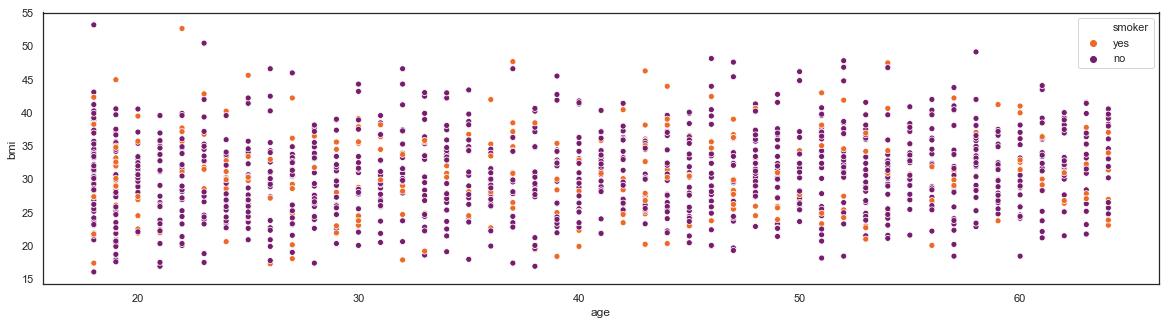

In [10]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='age', y='bmi', hue ='smoker', data = insurance, palette='inferno_r')
plt.show()

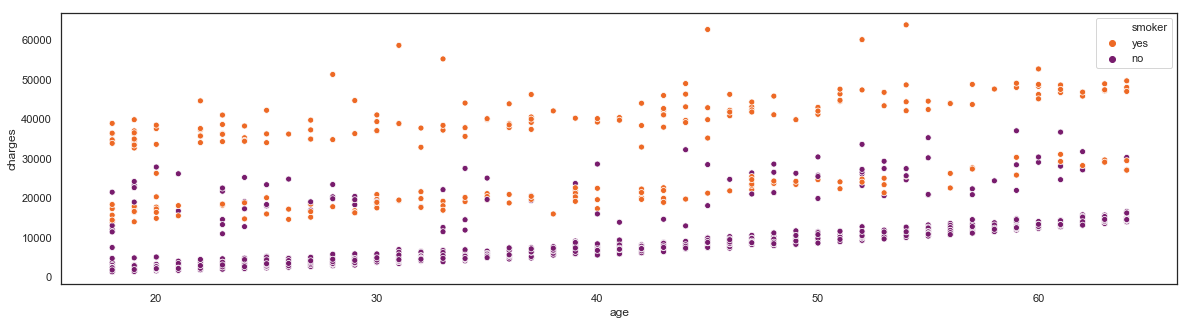

In [11]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data = insurance, palette='inferno_r')

In [12]:
def sex_transform(sex):
    if sex == 'male':
        return 0
    else:
        return 1
    
def smoker_transform(smoker):
    if smoker == 'yes':
        return 1
    else:
        return 0
    
def region_transform(region):
    if region == 'southwest':
        return 0
    elif region == 'southeast':
        return 1
    elif region == 'northwest':
        return 2
    else:
        return 3

insurance['sex'] = insurance['sex'].apply(sex_transform)
insurance['smoker'] = insurance['smoker'].apply(smoker_transform)
insurance['region'] = insurance['region'].apply(region_transform)
    

In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [16]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  

scaler = StandardScaler()

y = insurance['charges'].values
X = insurance.drop('charges', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)


lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
sgd = SGDRegressor()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()




models = [lr, ridge, lasso, sgd, tree, rf]

for model in models:
    if model == lasso or model == ridge:
        parameters = {'model__alpha': np.arange(1.0,1.5, 0.1)}
    elif model == sgd:
        parameters = {'model__penalty': ('l1', 'l2', 'elasticnet')}
    elif model == rf:
        parameters = {'model__n_estimators': (10, 15, 20)}
    else:
        parameters = {}
    
    steps = [('scaler', scaler),('model', model)]
    pipeline = Pipeline(steps)
    model_cv = RandomizedSearchCV(pipeline,
                        param_distributions=parameters, 
                        cv=3)
    model_cv.fit(X_train, y_train)

    print(model_cv.best_params_, model_cv.best_score_)

{} 0.732035623352436
{'model__alpha': 1.4000000000000004} 0.7320721034234065
{'model__alpha': 1.4000000000000004} 0.7320420749284954
{'model__penalty': 'elasticnet'} 0.7318594054805873
{} 0.6638973705632093
{'model__n_estimators': 10} 0.8246787275219845
